In [1]:
#import basic packages to deal with data and load the data into a data frame
import pandas as pd
import numpy as np
df=pd.read_csv("potential-talents.csv")

In [2]:
df.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


Some initial EDA. Looking at what values our features have

In [3]:
df.location.unique()

array(['Houston, Texas', 'Kanada', 'Raleigh-Durham, North Carolina Area',
       'Denton, Texas', 'İzmir, Türkiye', 'Greater New York City Area',
       'San Francisco Bay Area', 'Greater Philadelphia Area',
       'Lake Forest, California', 'Houston, Texas Area',
       'Atlanta, Georgia', 'Chicago, Illinois', 'Austin, Texas Area',
       'Jackson, Mississippi Area', 'Greater Grand Rapids, Michigan Area',
       'Virginia Beach, Virginia', 'Monroe, Louisiana Area',
       'Greater Boston Area', 'San Jose, California',
       'New York, New York', 'Dallas/Fort Worth Area',
       'Amerika Birleşik Devletleri', 'Baton Rouge, Louisiana Area',
       'Myrtle Beach, South Carolina Area', 'Chattanooga, Tennessee Area',
       'Los Angeles, California', 'Highland, California',
       'Gaithersburg, Maryland', 'Baltimore, Maryland',
       'Milpitas, California', 'Greater Atlanta Area',
       'Greater Chicago Area', 'Torrance, California',
       'Long Beach, California', 'Bridgewater, Massa

In [4]:
df.job_title.unique()

array(['2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
       'Native English Teacher at EPIK (English Program in Korea)',
       'Aspiring Human Resources Professional',
       'People Development Coordinator at Ryan',
       'Advisory Board Member at Celal Bayar University',
       'Aspiring Human Resources Specialist',
       'Student at Humber College and Aspiring Human Resources Generalist',
       'HR Senior Specialist',
       'Seeking Human Resources HRIS and Generalist Positions',
       'Student at Chapman University',
       'SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR',
       'Human Resources Coordinator at InterContinental Buckhead Atlanta',
       'Aspiring Human Resources Management student seeking an internship',
       'Seeking Human Resources Opportunities',
       'Experienced Retail Manager and aspiring Human Resources Professional',
       'H

In [5]:
df.connection.value_counts()

500+     44
85        7
61        7
44        6
1         5
2         4
4         2
7         2
57        2
390       2
103       1
48        1
18        1
71        1
19        1
415       1
9         1
64        1
39        1
155       1
349       1
174       1
40        1
50        1
268       1
455       1
52        1
409       1
212       1
16        1
5         1
82        1
49        1
Name: connection, dtype: int64

In [6]:
df.dtypes

id              int64
job_title      object
location       object
connection     object
fit           float64
dtype: object

We want to start preprocessing the field so they can be used. We will not do anything with the location field for now. We want to convert connections into a numeric value in case we want that to be a relevant factor and change the job_title field to a string that we can use for NLP

In [7]:
#turn connections into a numeric field for potential use
df.connection=df.connection.str.replace("500+ ","500",regex=False)
df.connection=df.connection.astype(int)

In [8]:
#Drop the 'fit' column. It will be added when we have a score
df.drop(columns=["fit"],inplace=True)
#Seeing how many duplicate entries we have
df_duplicate = df.drop(['id'], axis = 1)                    
print("Duplicate No:", df_duplicate.duplicated().sum())   

Duplicate No: 51


In [9]:
#Get rid of duplicate entries for learning and reindex
X = df[~df_duplicate.duplicated()]
X = X.reset_index()

X.drop('index', axis = 1, inplace = True)

In [10]:
X.shape

(53, 4)

In [11]:
#Replace "HR" with "Human Resources" since that's generally what it refers to
X.job_title=X.job_title.str.replace("HR "," Human Resources ")

In [12]:
#Standardize by putting everything in lower case
X.job_title=X.job_title.str.lower()

In [13]:
#Get rid of all characters other than letters and white space
X.job_title=X.job_title.str.replace("[^a-z\s]","",regex=True)

In [14]:
#Make all the spacing uniquely single space
X.job_title=X.job_title.apply(lambda x : " ".join(x.split()))

In [15]:
X.job_title.unique()

array(['ct bauer college of business graduate magna cum laude and aspiring human resources professional',
       'native english teacher at epik english program in korea',
       'aspiring human resources professional',
       'people development coordinator at ryan',
       'advisory board member at celal bayar university',
       'aspiring human resources specialist',
       'student at humber college and aspiring human resources generalist',
       'human resources senior specialist',
       'seeking human resources hris and generalist positions',
       'student at chapman university',
       'svp chro marketing communications csr officer engie houston the woodlands energy gp human resources sphr',
       'human resources coordinator at intercontinental buckhead atlanta',
       'aspiring human resources management student seeking an internship',
       'seeking human resources opportunities',
       'experienced retail manager and aspiring human resources professional',
       'hu

In [16]:
#Our search strings
query_1="aspiring human resources"
query_2="seeking human resources"
query_list=[query_1,query_2]

We need to build some metrics to see how well the job title matches our query strings. The general approach will be to vectorize the job titles, vectorize the query strings and use cosine similarity to see how closely they match. 

In [17]:
#One way to vectorize is TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#Use TfIdf to vectorize the job titles
tfv=TfidfVectorizer()
vects=tfv.fit_transform(X.job_title)
#Get the appropriate vectors for the queries we want
tf_query=tfv.transform(query_list)

In [18]:
#Look at the similarity to each of our queries
X["tfidf_sim_1"]=cosine_similarity(vects,tf_query)[:,0]
X["tfidf_sim_2"]=cosine_similarity(vects,tf_query)[:,1]

In [19]:
X.head()

,id,job_title,location,connection,tfidf_sim_1,tfidf_sim_2
0,1,ct bauer college of business graduate magna cu...,"Houston, Texas",85,0.236008,0.092766
1,2,native english teacher at epik english program...,Kanada,500,0.000000,0.000000
2,3,aspiring human resources professional,"Raleigh-Durham, North Carolina Area",44,0.753385,0.296128
3,4,people development coordinator at ryan,"Denton, Texas",500,0.000000,0.000000
4,5,advisory board member at celal bayar university,"İzmir, Türkiye",500,0.000000,0.000000


In [20]:
X.sort_values("tfidf_sim_1",ascending=False).head(10)

,id,job_title,location,connection,tfidf_sim_1,tfidf_sim_2
45,97,aspiring human resources professional,"Kokomo, Indiana Area",71,0.753385,0.296128
2,3,aspiring human resources professional,"Raleigh-Durham, North Carolina Area",44,0.753385,0.296128
5,6,aspiring human resources specialist,Greater New York City Area,1,0.673329,0.264661
21,73,aspiring human resources manager seeking inter...,"Houston, Texas Area",7,0.558881,0.573491
20,72,business management major and aspiring human r...,"Monroe, Louisiana Area",5,0.406815,0.159904
12,27,aspiring human resources management student se...,"Houston, Texas Area",500,0.390172,0.413985
22,74,human resources professional,Greater Boston Area,16,0.384109,0.362014
14,66,experienced retail manager and aspiring human ...,"Austin, Texas Area",57,0.382874,0.150494
6,7,student at humber college and aspiring human r...,Kanada,61,0.362664,0.142550
27,79,liberal arts major aspiring human resources an...,"Baton Rouge, Louisiana Area",7,0.348906,0.137142


In [21]:
X.sort_values("tfidf_sim_2",ascending=False).head(10)

,id,job_title,location,connection,tfidf_sim_1,tfidf_sim_2
13,28,seeking human resources opportunities,"Chicago, Illinois",390,0.263981,0.671599
47,99,seeking human resources position,"Las Vegas, Nevada Area",48,0.263981,0.671599
21,73,aspiring human resources manager seeking inter...,"Houston, Texas Area",7,0.558881,0.573491
12,27,aspiring human resources management student se...,"Houston, Texas Area",500,0.390172,0.413985
8,10,seeking human resources hris and generalist po...,Greater Philadelphia Area,500,0.160864,0.409258
22,74,human resources professional,Greater Boston Area,16,0.384109,0.362014
48,100,aspiring human resources manager graduating ma...,"Cape Girardeau, Missouri",103,0.342203,0.351149
42,94,seeking human resources opportunities open to ...,Amerika Birleşik Devletleri,415,0.128349,0.326536
23,75,nortia staffing is seeking human resources pay...,"San Jose, California",500,0.118130,0.300537
2,3,aspiring human resources professional,"Raleigh-Durham, North Carolina Area",44,0.753385,0.296128


In [22]:
#We want to see how well a candidate matches either of the desired queries so take the maximum
X["tfidf_score"]=X[["tfidf_sim_1","tfidf_sim_2"]].max(axis=1)
X.head()

,id,job_title,location,connection,tfidf_sim_1,tfidf_sim_2,tfidf_score
0,1,ct bauer college of business graduate magna cu...,"Houston, Texas",85,0.236008,0.092766,0.236008
1,2,native english teacher at epik english program...,Kanada,500,0.000000,0.000000,0.000000
2,3,aspiring human resources professional,"Raleigh-Durham, North Carolina Area",44,0.753385,0.296128,0.753385
3,4,people development coordinator at ryan,"Denton, Texas",500,0.000000,0.000000,0.000000
4,5,advisory board member at celal bayar university,"İzmir, Türkiye",500,0.000000,0.000000,0.000000


In [23]:
X.sort_values("tfidf_score",ascending=False).head(10)

,id,job_title,location,connection,tfidf_sim_1,tfidf_sim_2,tfidf_score
2,3,aspiring human resources professional,"Raleigh-Durham, North Carolina Area",44,0.753385,0.296128,0.753385
45,97,aspiring human resources professional,"Kokomo, Indiana Area",71,0.753385,0.296128,0.753385
5,6,aspiring human resources specialist,Greater New York City Area,1,0.673329,0.264661,0.673329
47,99,seeking human resources position,"Las Vegas, Nevada Area",48,0.263981,0.671599,0.671599
13,28,seeking human resources opportunities,"Chicago, Illinois",390,0.263981,0.671599,0.671599
21,73,aspiring human resources manager seeking inter...,"Houston, Texas Area",7,0.558881,0.573491,0.573491
12,27,aspiring human resources management student se...,"Houston, Texas Area",500,0.390172,0.413985,0.413985
8,10,seeking human resources hris and generalist po...,Greater Philadelphia Area,500,0.160864,0.409258,0.409258
20,72,business management major and aspiring human r...,"Monroe, Louisiana Area",5,0.406815,0.159904,0.406815
22,74,human resources professional,Greater Boston Area,16,0.384109,0.362014,0.384109


In [24]:
#import packages to build neural network and look at how we did
import tensorflow as tf
from tensorflow.keras import layers, activations, losses, Model, Input
from tensorflow.nn import leaky_relu

from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [25]:
#Implement RankNet 
class RankNet(Model):
    def __init__(self):
        super().__init__()
        #layers for the neural network
        self.dense = [layers.Dense(16, activation=leaky_relu), layers.Dropout(0.2), layers.Dense(16, activation=leaky_relu),layers.Dropout(0.2),layers.Dense(16, activation=leaky_relu)]
        self.o = layers.Dense(1, activation='linear')
        self.oi_minus_oj = layers.Subtract()
    #Implementing ranknet by passing both inputs through the same forward feed network, subtracting, and passing to a sigmoid activation function
    def call(self, inputs):
        xi, xj = inputs
        densei = self.dense[0](xi)
        densej = self.dense[0](xj)
        for dense in self.dense[1:]:
            densei = dense(densei)
            densej = dense(densej)
        oi = self.o(densei)
        oj= self.o(densej)
        oij = self.oi_minus_oj([oi, oj])
        output = layers.Activation('sigmoid')(oij)
        return output
    #Create a separate predict method to get a prediction for the fit from a single input
    def predict(self,_input):
        x=_input
        _dense=self.dense[0](x)
        for dense in self.dense[1:]:
            _dense_=dense(_dense)
        _o=self.o(_dense)
        output=layers.Activation('sigmoid')(_o)
        return output
    
    


In [35]:
def rank(df,starred=[]):
    #Create a new column for starred scores, that default to the score we have already
    df["starred_score"]=df.tfidf_score
    #Change the score of any starred candidates to 1
    for id in starred:
        df.loc[df['id']==id,'starred_score']=1
    ranknet=RankNet()
    ranknet.compile(optimizer='adam',loss='binary_crossentropy',metrics="accuracy")
    #Build 2 large random samples to pass through RankNet
    random_row_1 = df.sample(n = 5000, replace = True)
    random_row_2 = df.sample(n = 5000, replace = True)
    #Vectorize the job title for the inputs
    doc1=tfv.transform(random_row_1["job_title"])
    doc2=tfv.transform(random_row_2["job_title"])
    #Ground truth for ranknet: output is 1 if first entry has higher value, 0 if second entry is higher, 0.5 if tied
    y=[]
    for i in range(len(random_row_1)):
        y_1=random_row_1.iloc[i]['starred_score']
        y_2=random_row_2.iloc[i]['starred_score']
        if y_1>y_2:
            y.append(1)
        elif y_1<y_2:
            y.append(0)
        else:
            y.append(0.5)
    y=np.array(y)
    #Train the neural network and return the prediction
    history=ranknet.fit([doc1.toarray(),doc2.toarray()],y,epochs=1000,validation_split=0.2,verbose=0)
    fit=ranknet.predict(tfv.transform(df.job_title).toarray())
    df["fit"]=1-fit
    #df.drop(columns=["starred_score"],inplace=True)
    return df,history

In [27]:
X_fit,history=rank(X)

In [29]:
X_fit.sort_values("fit",ascending=False).head(10)

,id,job_title,location,connection,tfidf_sim_1,tfidf_sim_2,tfidf_score,fit
5,6,aspiring human resources specialist,Greater New York City Area,1,0.673329,0.264661,0.673329,0.835146
2,3,aspiring human resources professional,"Raleigh-Durham, North Carolina Area",44,0.753385,0.296128,0.753385,0.813379
45,97,aspiring human resources professional,"Kokomo, Indiana Area",71,0.753385,0.296128,0.753385,0.813379
30,82,aspiring human resources professional an energ...,"Austin, Texas Area",174,0.331829,0.130430,0.331829,0.696919
42,94,seeking human resources opportunities open to ...,Amerika Birleşik Devletleri,415,0.128349,0.326536,0.326536,0.692403
47,99,seeking human resources position,"Las Vegas, Nevada Area",48,0.263981,0.671599,0.671599,0.672325
18,70,retired army national guard recruiter office m...,"Virginia Beach, Virginia",82,0.104081,0.264796,0.264796,0.646989
23,75,nortia staffing is seeking human resources pay...,"San Jose, California",500,0.118130,0.300537,0.300537,0.637648
13,28,seeking human resources opportunities,"Chicago, Illinois",390,0.263981,0.671599,0.671599,0.603329
21,73,aspiring human resources manager seeking inter...,"Houston, Texas Area",7,0.558881,0.573491,0.573491,0.582048


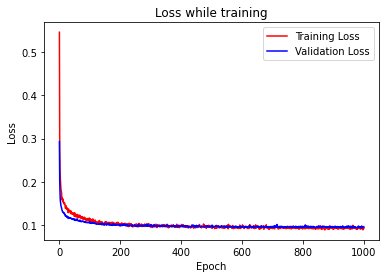

In [30]:
plt.plot(history.history["loss"],color="r")
plt.plot(history.history["val_loss"],color="b")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss","Validation Loss"])
plt.title("Loss while training")
plt.show()

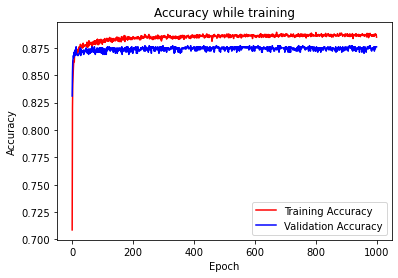

In [31]:
plt.plot(history.history["accuracy"],color="r")
plt.plot(history.history["val_accuracy"],color="b")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.title("Accuracy while training")
plt.show()

In [36]:
X_fit,history=rank(X,[73])

In [37]:
X_fit.sort_values("fit",ascending=False).head(10)

,id,job_title,location,connection,tfidf_sim_1,tfidf_sim_2,tfidf_score,fit,starred_score
21,73,aspiring human resources manager seeking inter...,"Houston, Texas Area",7,0.558881,0.573491,0.573491,0.999912,1.000000
2,3,aspiring human resources professional,"Raleigh-Durham, North Carolina Area",44,0.753385,0.296128,0.753385,0.996713,0.753385
45,97,aspiring human resources professional,"Kokomo, Indiana Area",71,0.753385,0.296128,0.753385,0.996713,0.753385
5,6,aspiring human resources specialist,Greater New York City Area,1,0.673329,0.264661,0.673329,0.982275,0.673329
47,99,seeking human resources position,"Las Vegas, Nevada Area",48,0.263981,0.671599,0.671599,0.970199,0.671599
13,28,seeking human resources opportunities,"Chicago, Illinois",390,0.263981,0.671599,0.671599,0.964985,0.671599
12,27,aspiring human resources management student se...,"Houston, Texas Area",500,0.390172,0.413985,0.413985,0.952341,0.413985
42,94,seeking human resources opportunities open to ...,Amerika Birleşik Devletleri,415,0.128349,0.326536,0.326536,0.950143,0.326536
30,82,aspiring human resources professional an energ...,"Austin, Texas Area",174,0.331829,0.130430,0.331829,0.920024,0.331829
23,75,nortia staffing is seeking human resources pay...,"San Jose, California",500,0.118130,0.300537,0.300537,0.911483,0.300537


In [39]:
X_fit,history=rank(X,[73,75])

In [40]:
X_fit.sort_values("fit",ascending=False).head(10)

,id,job_title,location,connection,tfidf_sim_1,tfidf_sim_2,tfidf_score,fit,starred_score
23,75,nortia staffing is seeking human resources pay...,"San Jose, California",500,0.118130,0.300537,0.300537,0.999977,1.000000
21,73,aspiring human resources manager seeking inter...,"Houston, Texas Area",7,0.558881,0.573491,0.573491,0.999892,1.000000
2,3,aspiring human resources professional,"Raleigh-Durham, North Carolina Area",44,0.753385,0.296128,0.753385,0.998701,0.753385
45,97,aspiring human resources professional,"Kokomo, Indiana Area",71,0.753385,0.296128,0.753385,0.998701,0.753385
5,6,aspiring human resources specialist,Greater New York City Area,1,0.673329,0.264661,0.673329,0.995959,0.673329
47,99,seeking human resources position,"Las Vegas, Nevada Area",48,0.263981,0.671599,0.671599,0.988830,0.671599
13,28,seeking human resources opportunities,"Chicago, Illinois",390,0.263981,0.671599,0.671599,0.988799,0.671599
8,10,seeking human resources hris and generalist po...,Greater Philadelphia Area,500,0.160864,0.409258,0.409258,0.977546,0.409258
12,27,aspiring human resources management student se...,"Houston, Texas Area",500,0.390172,0.413985,0.413985,0.973328,0.413985
20,72,business management major and aspiring human r...,"Monroe, Louisiana Area",5,0.406815,0.159904,0.406815,0.902742,0.406815
